In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [7]:
data = pd.read_csv('melb_data.csv')

In [9]:
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [15]:
data.dropna(inplace=True)


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6196 entries, 1 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6196 non-null   object 
 1   Address        6196 non-null   object 
 2   Rooms          6196 non-null   int64  
 3   Type           6196 non-null   object 
 4   Price          6196 non-null   float64
 5   Method         6196 non-null   object 
 6   SellerG        6196 non-null   object 
 7   Date           6196 non-null   object 
 8   Distance       6196 non-null   float64
 9   Postcode       6196 non-null   float64
 10  Bedroom2       6196 non-null   float64
 11  Bathroom       6196 non-null   float64
 12  Car            6196 non-null   float64
 13  Landsize       6196 non-null   float64
 14  BuildingArea   6196 non-null   float64
 15  YearBuilt      6196 non-null   float64
 16  CouncilArea    6196 non-null   object 
 17  Lattitude      6196 non-null   float64
 18  Longtitude  

In [31]:
from sklearn.model_selection import train_test_split

X = data.drop(['Price'], axis=1)
y = data['Price']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
train_data = X_train.join(y_train)


In [37]:
train_data

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price
8843,Jacana,34 Bliburg St,4,h,PI,YPA,1/07/2017,14.0,3047.0,4.0,...,1.0,692.0,181.00,1960.0,Hume,-37.68760,144.91167,Northern Metropolitan,851.0,650000.0
2266,Elwood,12/27 Dickens St,2,u,S,hockingstuart,4/03/2017,7.7,3184.0,2.0,...,1.0,1966.0,85.00,1960.0,Port Phillip,-37.87250,144.98480,Southern Metropolitan,8989.0,855000.0
8544,Yarraville,2C Castlemaine St,3,h,PI,Jas,29/04/2017,7.0,3013.0,3.0,...,2.0,305.0,220.00,2007.0,Maribyrnong,-37.81490,144.89420,Western Metropolitan,6543.0,1425000.0
10343,Hoppers Crossing,138 Bellbridge Dr,3,h,SP,Barry,27/05/2017,18.4,3029.0,3.0,...,2.0,530.0,169.00,1999.0,Wyndham,-37.86713,144.71086,Western Metropolitan,13830.0,520000.0
7754,Coburg,22/129 Harding St,3,t,S,Barry,13/05/2017,7.8,3058.0,3.0,...,2.0,120.0,113.76,1990.0,Moreland,-37.74620,144.97950,Northern Metropolitan,11204.0,824000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,St Kilda,51/167 Fitzroy St,3,u,PI,Kay,25/02/2017,6.1,3182.0,3.0,...,2.0,0.0,3.00,1850.0,Port Phillip,-37.85840,144.98020,Southern Metropolitan,13240.0,1600000.0
11813,Sunshine North,95A Berkshire Rd,4,t,SP,Sweeney,22/07/2017,10.5,3020.0,4.0,...,1.0,283.0,181.60,2005.0,Brimbank,-37.76508,144.83629,Western Metropolitan,4217.0,650000.0
10272,Ferntree Gully,24a Helen Rd,2,u,S,Schroeder,27/05/2017,24.8,3156.0,2.0,...,1.0,306.0,120.00,2011.0,Knox,-37.87275,145.26325,Eastern Metropolitan,10788.0,617000.0
2937,Glenroy,52 Glenroy Rd,2,h,S,Barry,25/02/2017,13.0,3046.0,2.0,...,1.0,668.0,88.00,1955.0,Moreland,-37.70670,144.93310,Northern Metropolitan,8870.0,741250.0


array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Postcode'}>,
        <Axes: title={'center': 'Bedroom2'}>],
       [<Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>,
        <Axes: title={'center': 'BuildingArea'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longtitude'}>,
        <Axes: title={'center': 'Propertycount'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

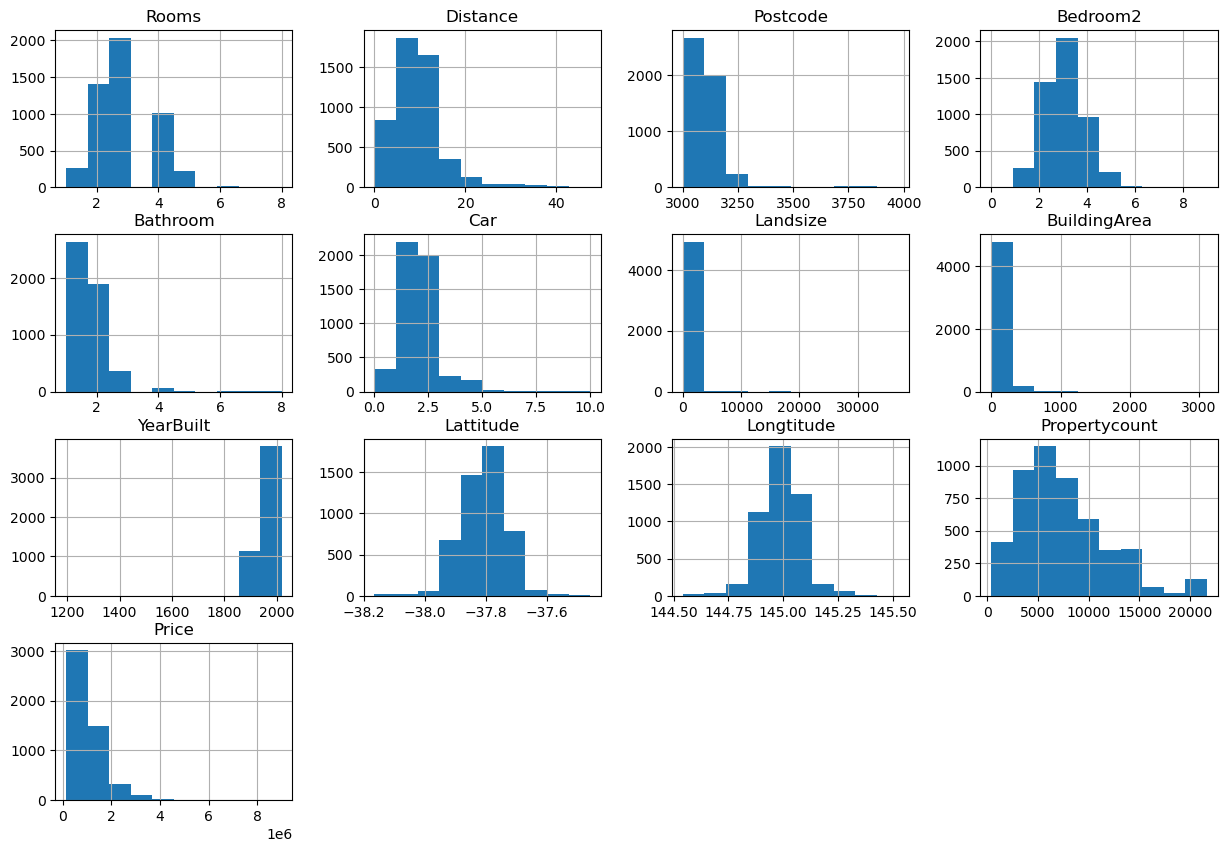

In [45]:
train_data.hist(figsize=(15, 10))

In [59]:
print(train_data.dtypes)


Suburb            object
Address           object
Rooms              int64
Type              object
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
Price            float64
dtype: object


In [65]:
print(train_data.columns)


Index(['Rooms', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Price'],
      dtype='object')


In [75]:
numeric_data = train_data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)


                  Rooms  Distance  Postcode  Bedroom2  Bathroom       Car  \
Rooms          1.000000  0.280700  0.053061  0.949756  0.613276  0.424936   
Distance       0.280700  1.000000  0.413355  0.287447  0.120157  0.274128   
Postcode       0.053061  0.413355  1.000000  0.056320  0.116115  0.051502   
Bedroom2       0.949756  0.287447  0.056320  1.000000  0.621225  0.428197   
Bathroom       0.613276  0.120157  0.116115  0.621225  1.000000  0.343357   
Car            0.424936  0.274128  0.051502  0.428197  0.343357  1.000000   
Landsize       0.094421  0.052858  0.024236  0.092786  0.074247  0.112748   
BuildingArea   0.590230  0.149245  0.082536  0.578077  0.521391  0.325909   
YearBuilt     -0.074534  0.240555  0.034086 -0.060445  0.153412  0.103065   
Lattitude      0.024130 -0.098504 -0.420316  0.030092 -0.072440  0.014608   
Longtitude     0.090656  0.223985  0.466632  0.090248  0.121601  0.055455   
Propertycount -0.099109 -0.068301  0.073288 -0.094033 -0.063343 -0.031781   